In [23]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [24]:
# convert csv to dataframe
df_final=pd.read_csv("filtered_datas.csv")
df_final

,Unnamed: 0,owner,modelYear,price,Kms Driven,Mileage,Seats,price_lakh,Fuel type_Cng,Fuel type_Diesel,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,0,3,2015,4.00,120000,23.10,5.0,4.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2,2018,8.11,32706,17.00,5.0,8.11,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,1,2018,5.85,11949,23.84,5.0,5.85,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2014,4.62,17794,19.10,5.0,4.62,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1,2015,7.90,60000,23.65,5.0,7.90,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,7476,1,2022,5.10,10000,25.24,5.0,5.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7477,7477,1,2014,1.80,120000,22.74,5.0,1.80,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7478,7478,3,2011,5.50,50000,11.74,5.0,5.50,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7479,7479,1,2012,1.40,40000,18.50,5.0,1.40,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
# statistical details of the data
df_final.describe()

,Unnamed: 0,owner,modelYear,price,Kms Driven,Mileage,Seats,price_lakh,Fuel type_Cng,Fuel type_Diesel,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
count,7481.000000,7481.000000,7481.000000,7481.000000,7.481000e+03,7481.000000,7481.000000,7481.000000,7481.00000,7481.000000,...,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000
mean,3740.000000,1.379495,2016.221494,6.285683,6.030031e+04,19.639755,5.171367,6.285683,0.01310,0.276968,...,0.000134,0.000134,0.000134,0.000134,0.176848,0.166021,0.162010,0.182997,0.142227,0.169897
std,2159.723015,0.656071,3.925339,3.594524,4.422370e+04,3.698751,0.616865,3.594524,0.11371,0.447531,...,0.011562,0.011562,0.011562,0.011562,0.381566,0.372124,0.368485,0.386690,0.349306,0.375567
min,0.000000,0.000000,1985.000000,0.280000,1.500000e+02,7.940000,2.000000,0.280000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1870.000000,1.000000,2014.000000,3.720000,3.304000e+04,17.400000,5.000000,3.720000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3740.000000,1.000000,2017.000000,5.540000,5.634600e+04,19.245568,5.000000,5.540000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5610.000000,2.000000,2019.000000,8.000000,8.000000e+04,21.700000,5.000000,8.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7480.000000,5.000000,2023.000000,17.750000,2.000022e+06,140.000000,10.000000,17.750000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# create x and y datas

x=df_final.drop(columns=["price"],axis=1)
y=df_final["price"]

In [27]:
# scaling the data with standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [28]:
import pickle
with open('standard.pkl','wb') as f:
    pickle.dump(scaler,f)

In [29]:
# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

        results = []

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                MSE_1=mean_squared_error(y_test,y_pred)
                MAE_1=mean_absolute_error(y_test,y_pred)
                RMSE_1=np.sqrt(mean_squared_error(y_test,y_pred))
                r_squr_1=r2_score(y_test,y_pred)
                results.append({"model": type(model).__name__,
                                          "MAE": MAE_1,
                                          "MSE": MSE_1,
                                          "RMSE": RMSE_1,
                                           "R2": r_squr_1 })
                print(f"Trainscore: {model.score(x_train, y_train)}")
                print(f"Testscore: {model.score(x_test, y_test)}")
                # Plot Actual vs Predicted Prices
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=y_test, y=y_pred)
                plt.xlabel('Actual Prices')
                plt.ylabel('Predicted Prices')
                plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
                plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Add reference line
                plt.show()
        results_df = pd.DataFrame(results)
        
        return results_df   

Trainscore: 1.0
Testscore: 1.0


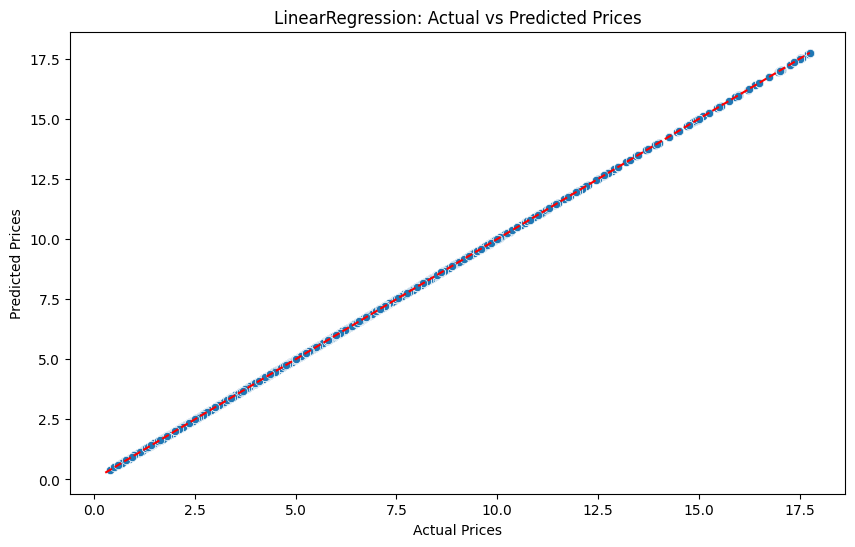

Trainscore: 1.0
Testscore: 0.9999962033824121


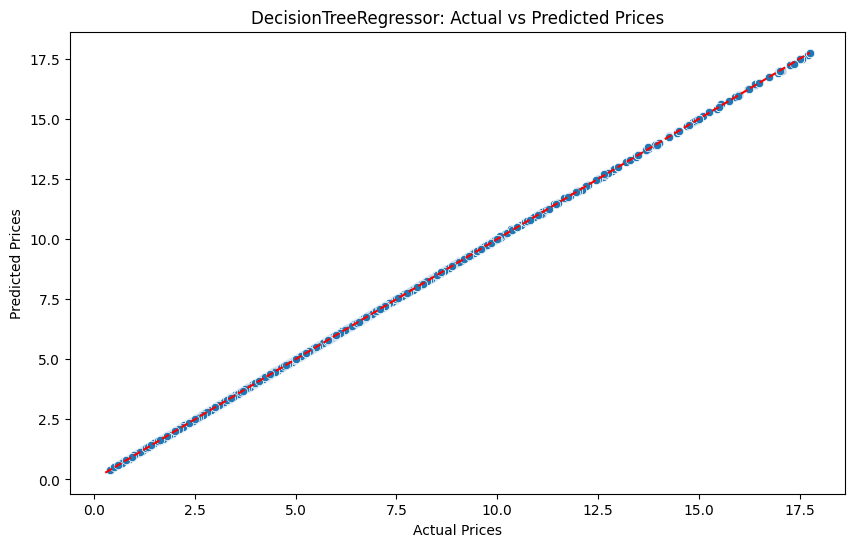

Trainscore: 0.999999579244048
Testscore: 0.9999981697778212


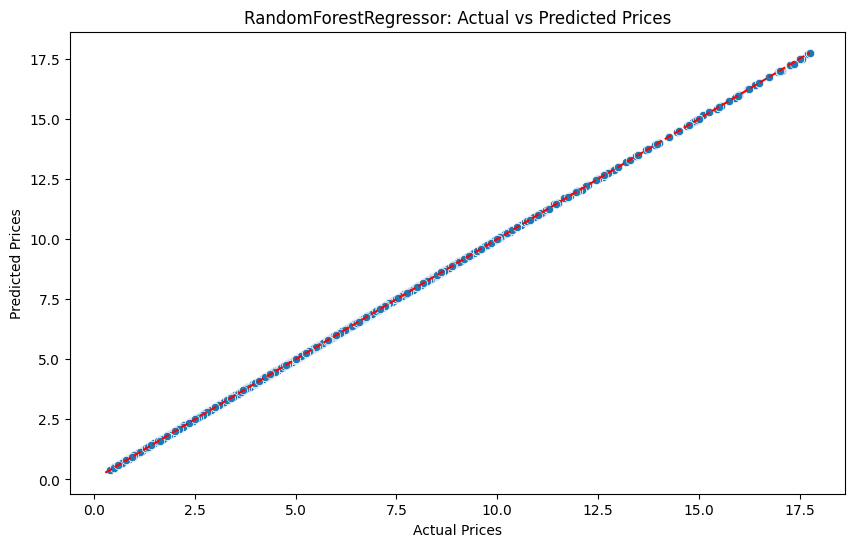

Trainscore: 0.999949682946353
Testscore: 0.9999475371018908


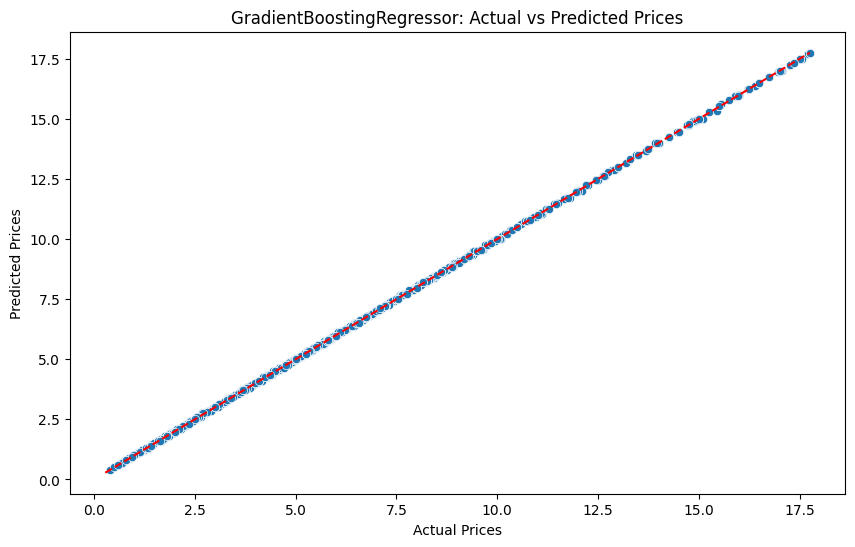

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor]

results_df = best_ML_algorithm(x_scaled,y, algorithms)

In [31]:
# model comparision
results_df

,model,MAE,MSE,RMSE,R2
0,LinearRegression,6.266381e-15,8.252719e-29,9.084448e-15,1.000000
1,DecisionTreeRegressor,1.704463e-03,4.906829e-05,7.004876e-03,0.999996
2,RandomForestRegressor,1.667626e-03,2.365418e-05,4.863556e-03,0.999998
3,GradientBoostingRegressor,1.846203e-02,6.780416e-04,2.603923e-02,0.999948


## L1 and L2 Regularaization

In [32]:
# using ridge to fit and evalutes the model
from sklearn.linear_model import Ridge
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values=[]
for i in alpha_values:
    ridgeModel = Ridge(alpha=i)
    ridgeModel.fit(X_train,Y_train)
    y_pred=ridgeModel.predict(X_test)
    r_squr=r2_score(Y_test,y_pred)
    values.append(r_squr)

In [33]:
# best alpha values for prediction
best_alpha_ridge = alpha_values[np.argmax(values)]
ridgeModel_1 = Ridge(alpha=best_alpha_ridge)
ridgeModel_1.fit(X_train, Y_train)
y_pred_ridge=ridgeModel_1.predict(X_test)


In [34]:
# model evaluation
MSE_ridge=mean_squared_error(Y_test,y_pred_ridge)
MAE_ridge=mean_absolute_error(Y_test,y_pred_ridge)
RMSE_ridge=np.sqrt(mean_squared_error(Y_test,y_pred_ridge))
r_squr_ridge=r2_score(Y_test,y_pred_ridge)

In [35]:
# create dataframe to view above evaluation metrics
ridge=pd.DataFrame({"model":"RidgeRegressor","MAE":[MSE_ridge],"MSE":[MAE_ridge],"RMSE":[RMSE_ridge],"R2":r_squr_ridge})
ridge

,model,MAE,MSE,RMSE,R2
0,RidgeRegressor,5.803282e-14,1.569216e-07,2.409000e-07,1.0


In [36]:
# using ridge to fit and evalutes the model
from sklearn.linear_model import Lasso
alpha_values_L = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values_L=[]
for i in alpha_values_L:
    LassoModel = Lasso(alpha=i)
    LassoModel.fit(X_train,Y_train)
    y_pred=LassoModel.predict(X_test)
    r_squr=r2_score(Y_test,y_pred)
    values_L.append(r_squr)
print(values_L)

[0.9999999547851659, 0.9999999225720786, 0.9999922572078564, 0.9992257207856494, 0.9225720785649398, -4.192291668259074e-06, -4.192291668259074e-06]


In [37]:
# best alpha values for prediction
best_alpha_lasso = alpha_values_L[np.argmax(values_L)]
LassoModel_1 = Lasso(alpha=best_alpha_lasso)
LassoModel_1.fit(X_train, Y_train)
y_pred_lasso=LassoModel_1.predict(X_test)

In [38]:
# model evaluation
MSE_lasso=mean_squared_error(Y_test,y_pred_lasso)
MAE_lasso=mean_absolute_error(Y_test,y_pred_lasso)
RMSE_lasso=np.sqrt(mean_squared_error(Y_test,y_pred_lasso))
r_squr_lasso=r2_score(Y_test,y_pred_lasso)

In [39]:
# create dataframe to view above evaluation metrics
lasso=pd.DataFrame({"model":"LassoRegressor","MAE":[MSE_lasso],"MSE":[MAE_lasso],"RMSE":[RMSE_lasso],"R2":r_squr_lasso})
lasso

,model,MAE,MSE,RMSE,R2
0,LassoRegressor,5.843661e-07,0.00066,0.000764,1.0


In [40]:
# Find the model with the highest R² score 
best_model_df = pd.concat([results_df,ridge,lasso], ignore_index=True)
best_model_df


,model,MAE,MSE,RMSE,R2
0,LinearRegression,6.266381e-15,8.252719e-29,9.084448e-15,1.000000
1,DecisionTreeRegressor,1.704463e-03,4.906829e-05,7.004876e-03,0.999996
2,RandomForestRegressor,1.667626e-03,2.365418e-05,4.863556e-03,0.999998
3,GradientBoostingRegressor,1.846203e-02,6.780416e-04,2.603923e-02,0.999948
4,RidgeRegressor,5.803282e-14,1.569216e-07,2.409000e-07,1.000000
5,LassoRegressor,5.843661e-07,6.597769e-04,7.644384e-04,1.000000


In [41]:
#convert dataframe to csv
path="best_model.csv"
best_model_df.to_csv(path,index=False)

In [42]:
best_model = best_model_df.loc[best_model_df['R2'].idxmax()]
print("Best model with high r2 score")
best_model

Best model with high r2 score


model    LinearRegression
MAE                   0.0
MSE                   0.0
RMSE                  0.0
R2                    1.0
Name: 0, dtype: object

### Hyperparameter tuning for the best model-Random forest

In [43]:
# parameters for model
from sklearn.model_selection import RandomizedSearchCV

param_grid = { 
    'n_estimators' : [100, 150, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False] 
}




In [44]:
# final model fit and prediction
final_model=RandomForestRegressor(n_estimators=200,max_features=None,max_depth=20,min_samples_leaf=4,
                                  min_samples_split=5,random_state=42)

final_model.fit(X_train,Y_train)

#Model evaluation
y_pred_fm=final_model.predict(X_test)
MSE_fm=mean_squared_error(Y_test,y_pred_fm)
MAE_fm=mean_absolute_error(Y_test,y_pred_fm)
RMSE_fm=np.sqrt(mean_squared_error(Y_test,y_pred_fm))
r_squr_fm=r2_score(Y_test,y_pred_fm)

print(f"Trainscore: {final_model.score(X_train, Y_train)}")
print(f"Testscore: {final_model.score(X_test, Y_test)}")

# create dataframe to view above evaluation metrics
rf_1=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_fm],"MSE":[MSE_fm],"RMSE":[RMSE_fm],"R2":r_squr_fm})
rf_1

Trainscore: 0.9999979915551138
Testscore: 0.9999965502578936


,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.002855,0.000045,0.006677,0.999997


###  store the model using pickle


In [45]:
import pickle
# store the model using pickle

with open('Randomforest_regression.pkl','wb') as files:
    pickle.dump(final_model,files)

In [46]:
# load the model,scaler and encoder
with open('Randomforest_regression.pkl','rb') as files:
    final_model=pickle.load(files)

with open('standard.pkl','rb') as f:
    scaler=pickle.load(f)

with open('encoder.pkl','rb') as file:
    encoder=pickle.load(file)

## model system buliding-Pipeline

In [48]:
#read final csv file
df_1=pd.read_csv("best_model.csv")
df_1

,model,MAE,MSE,RMSE,R2
0,LinearRegression,6.266381e-15,8.252719e-29,9.084448e-15,1.000000
1,DecisionTreeRegressor,1.704463e-03,4.906829e-05,7.004876e-03,0.999996
2,RandomForestRegressor,1.667626e-03,2.365418e-05,4.863556e-03,0.999998
3,GradientBoostingRegressor,1.846203e-02,6.780416e-04,2.603923e-02,0.999948
4,RidgeRegressor,5.803282e-14,1.569216e-07,2.409000e-07,1.000000
5,LassoRegressor,5.843661e-07,6.597769e-04,7.644384e-04,1.000000


In [ ]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,random_state=42)

In [ ]:
# building pipeline for categorical and numerical data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num=x_df.select_dtypes(include=["int","float"]).columns.to_list()
cat=x_df.select_dtypes(include=["object"]).columns.to_list()

catg_preprocessor=Pipeline(steps=[("categorical",encoder)])
num_preprocessor=Pipeline(steps=[("numerical",scaler)])



In [ ]:
# compose preprocessing techniques
preprocessor=ColumnTransformer([("numerical",num_preprocessor,num),
                                ("categorical",catg_preprocessor,cat)])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('numerical',
                                                  StandardScaler())]),
                                 ['ownerNo', 'modelYear', 'Kms Driven',
                                  'Mileage', 'Seats']),
                                ('categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Fuel type', 'body type', 'transmission',
                                  'Brand', 'model', 'Insurance Validity',
                                  'Color', 'City'])])

In [ ]:
#construct pipeline to combine preprocessor and model
pipeline=Pipeline([("preprocessing",preprocessor),
                   ("model",final_model)])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Fuel type', 'body type',
                                                   'transmission', 'Brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color', 'City'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

In [ ]:
# fit with dataframe
pipeline.fit(x_df_train,y_df_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Fuel type', 'body type',
                                                   'transmission', 'Brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color', 'City'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

In [ ]:
# evaluate the pipeline 
y_prediction=pipeline.predict(x_df_test)

MSE_pipe=mean_squared_error(y_df_test,y_prediction)

MAE_pipe=mean_absolute_error(y_df_test,y_prediction)

RMSE_pipe=np.sqrt(mean_squared_error(y_df_test,y_prediction))

r_squr_pipe=r2_score(y_df_test,y_prediction)

# create dataframe to view above evaluation metrics
Rf_Pipe=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_pipe],"MSE":[MSE_pipe],"RMSE":[RMSE_pipe],"R2":r_squr_pipe})
Rf_Pipe

,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,2.541712,51.912291,7.205018,0.641305


In [ ]:
x_df.columns

Index(['Fuel type', 'body type', 'transmission', 'ownerNo', 'Brand', 'model',
       'modelYear', 'Insurance Validity', 'Kms Driven', 'Mileage', 'Seats',
       'Color', 'City'],
      dtype='object')

In [ ]:
x_df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [ ]:
df_1[df_1["price"]>45]

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
16,Diesel,SUV,Automatic,1,Mercedes-Benz,Mercedes-Benz GLA,2022,55.95,Comprehensive,16000,19.245568,5,Blue,Bangalore
24,Petrol,Sedan,Automatic,2,Mercedes-Benz,Mercedes-Benz S-Class,2016,49.00,Third Party insurance,50000,7.810000,5,Others,Bangalore
38,Petrol,Sedan,Automatic,1,BMW,BMW 5 Series,2020,49.65,Zero Dep,18157,15.560000,5,Blue,Bangalore
52,Diesel,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2022,79.90,Third Party,400,19.245568,5,White,Bangalore
93,Diesel,Sedan,Automatic,2,Mercedes-Benz,Mercedes-Benz E-Class,2018,59.90,Comprehensive,24000,17.000000,5,White,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,Lpg,Hatchback,Manual,2,Maruti,Maruti Wagon R,2009,65.00,Third Party insurance,120000,17.300000,5,Silver,Kolkata
8106,Petrol,Convertibles,Automatic,3,Jaguar,Jaguar F-TYPE,2014,64.00,Comprehensive,31828,15.150000,2,Orange,Kolkata
8232,Diesel,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2020,55.41,Comprehensive,20000,16.100000,5,Grey,Kolkata
8300,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2009,75.00,Third Party insurance,50000,21.100000,5,Others,Kolkata


In [ ]:
df_1.loc[24]

Fuel type                            Petrol
body type                             Sedan
transmission                      Automatic
ownerNo                                   2
Brand                         Mercedes-Benz
model                 Mercedes-Benz S-Class
modelYear                              2016
price                                  49.0
Insurance Validity    Third Party insurance
Kms Driven                            50000
Mileage                                7.81
Seats                                     5
Color                                Others
City                              Bangalore
Name: 24, dtype: object

In [ ]:
x_df[x_df["Brand"]=="BMW"]

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
20,Diesel,Sedan,Automatic,3,BMW,BMW 5 Series,2011,Third Party insurance,100000,18.48,5,White,Bangalore
38,Petrol,Sedan,Automatic,1,BMW,BMW 5 Series,2020,Zero Dep,18157,15.56,5,Blue,Bangalore
72,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series GT,2016,Comprehensive,40525,21.76,5,White,Bangalore
88,Diesel,SUV,Automatic,2,BMW,BMW X3,2016,Comprehensive,92000,16.55,5,White,Bangalore
116,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2008,Third Party insurance,80000,13.20,5,Others,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,Diesel,Sedan,Automatic,3,BMW,BMW 6 Series,2018,Comprehensive,44226,17.09,4,White,Kolkata
8133,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2015,Third Party insurance,70000,18.88,5,Blue,Kolkata
8140,Petrol,Sedan,Automatic,3,BMW,BMW 3 Series,2010,Third Party insurance,20000,12.05,5,Others,Kolkata
8271,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series,2018,Comprehensive,23000,22.69,5,Blue,Kolkata


In [ ]:
df_1.iloc[20]

Fuel type                            Diesel
body type                             Sedan
transmission                      Automatic
ownerNo                                   3
Brand                                   BMW
model                          BMW 5 Series
modelYear                              2011
price                                  22.0
Insurance Validity    Third Party insurance
Kms Driven                           100000
Mileage                               18.48
Seats                                     5
Color                                 White
City                              Bangalore
Name: 20, dtype: object

## Model prediction

In [ ]:
# New data to predict car price
new_df=pd.DataFrame({
    'Fuel type':'Disel',
    'body type':'Sedan',
    'transmission':'Automatic',
    'ownerNo':3,
    'Brand':'BMW',
    'model':'BMW 5 Series',
    'modelYear':2011,
    'Insurance Validity': 'Third Party insurance',
    'Kms Driven':100000.0,
    'Mileage':18,
    'Seats':5,
    'Color':'White',
    'City':'Bangalore'
},index=[0])
new_df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Disel,Sedan,Automatic,3,BMW,BMW 5 Series,2011,Third Party insurance,100000.0,18,5,White,Bangalore


In [ ]:
# FINAL MODEL PREDICTION 
prediction=pipeline.predict(new_df)
print(f"The price of the {new_df['Brand'].iloc[0]} car is: {round(prediction[0],2)} lakhs")


The price of the BMW car is: 15.21 lakhs


In [ ]:
# save the pipeline in pickle

with open('pipeline.pkl','wb') as files:
    pickle.dump(pipeline,files)